#1. File Upload

In [1]:
from google.colab import files
upload_file = files.upload()

Saving car1.jpg to car1.jpg


#2. Load File

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
print(cv2.__version__)

4.1.2


In [4]:
!ls -al

total 96
drwxr-xr-x 1 root root  4096 Jun  2 08:00 .
drwxr-xr-x 1 root root  4096 Jun  2 07:56 ..
-rw-r--r-- 1 root root 77963 Jun  2 08:00 car1.jpg
drwxr-xr-x 4 root root  4096 May  6 13:43 .config
drwxr-xr-x 1 root root  4096 May  6 13:44 sample_data


In [5]:
img = cv2.imread('car1.jpg')

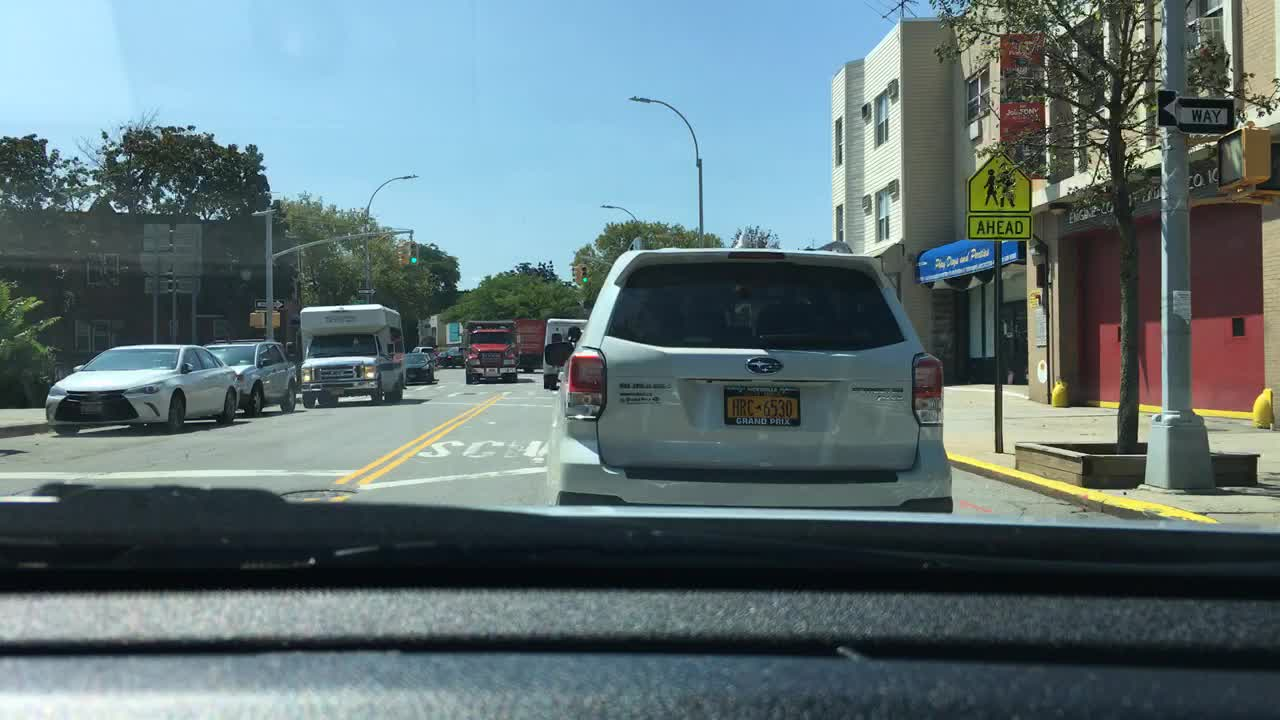

In [6]:
cv2_imshow(img)

In [7]:
print("width: {} pixels".format(img.shape[1]))
print("Height: {} pixels".format(img.shape[0]))
print("Channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]
center = (width//2, height//2)

print(height, width, center)

width: 1280 pixels
Height: 720 pixels
Channels: 3
720 1280 (640, 360)


In [8]:
X = 148 #@param {type:"slider", min:0, max:1280, step:1}
Y = 152 #@param {type:"slider", min:0, max:720, step:1}
SIZE = 100 #@param {type:"slider", min:0, max:1280, step:1}

In [9]:
(b,g,r) = img[X, Y]
print("Pixel at ({}, {}) - Red: {}, Green: {}, Blue: {}".format(X, Y, r, g, b))

Pixel at (148, 152) - Red: 34, Green: 44, Blue: 36


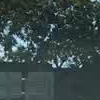

In [10]:
# crop coordination = image[y:y+h, x:x+w]
crop = img[Y:Y+SIZE, X:X+SIZE]
cv2_imshow(crop)

In [11]:
background = np.full((height,width,3), 255, np.uint8)

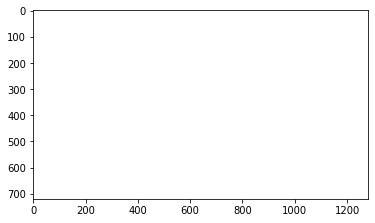

In [12]:
plt.imshow(background)

In [13]:
img[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)
background[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)

In [ ]:
cv2.rectangle(img, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0, 255, 0), 5)
cv2.rectangle(background, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0, 255, 0), 5)

In [ ]:
radius = int(SIZE/2)
cv2.circle(img, (X+SIZE*4, Y+radius), radius, (255,255,0), -1)
cv2.circle(background, (X+SIZE*4, Y+radius), radius, (255,255,0), -1)

In [ ]:
cv2.line(img, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)
cv2.line(background, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)

In [ ]:
cv2.putText(img, 'Apple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0))
cv2.putText(background, 'Apple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0))

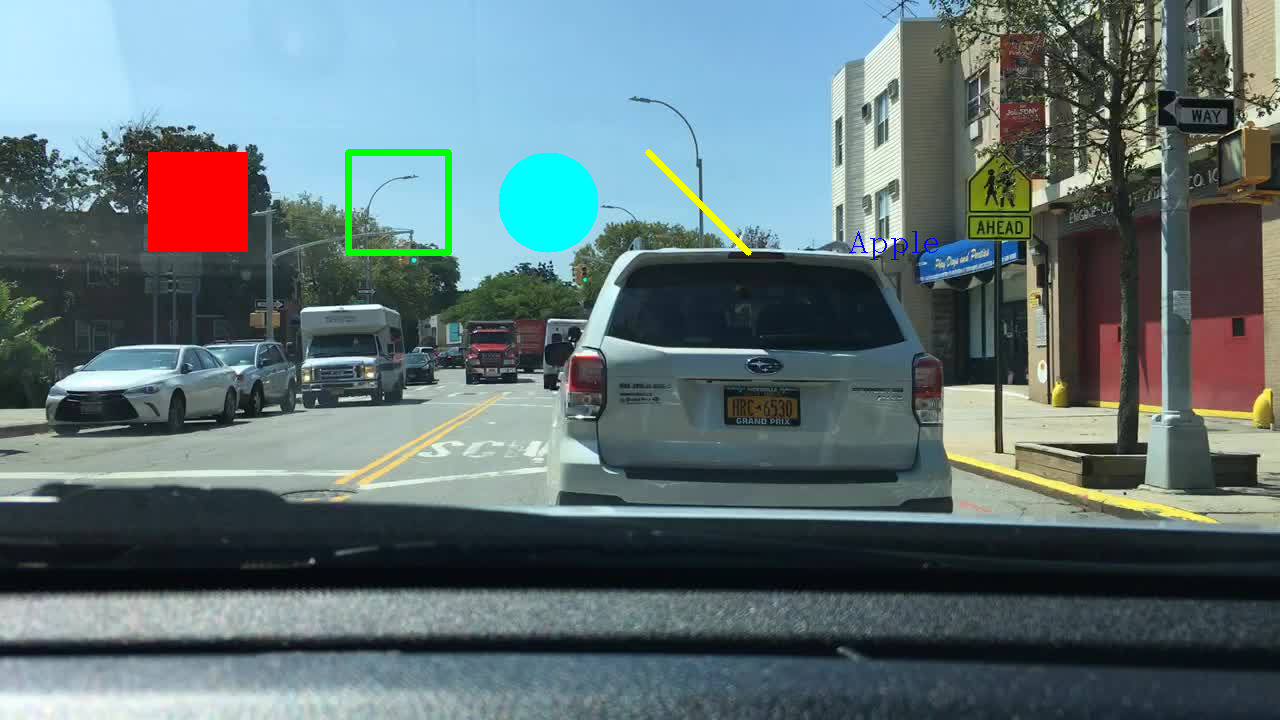

In [18]:
cv2_imshow(img)

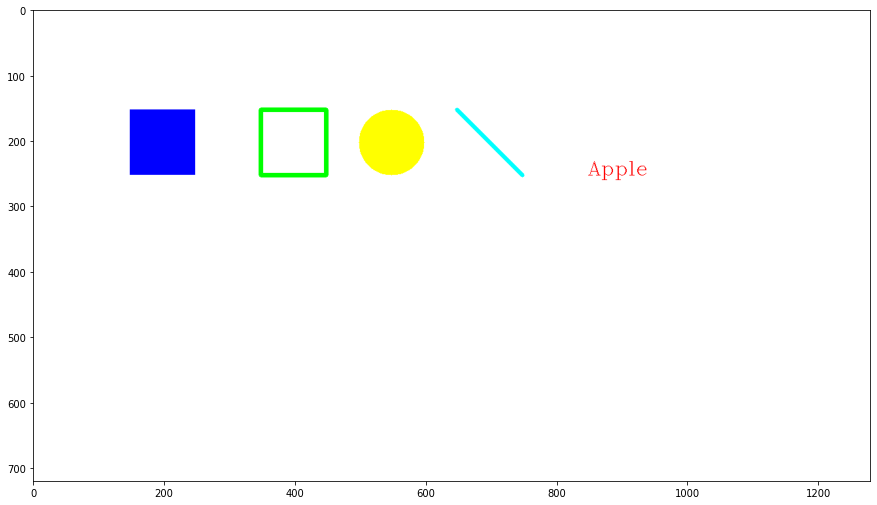

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(background)

In [20]:
cv2.imwrite('car1_copy.jpg', img)

True

In [21]:
cv2.imwrite('plt_copy.jpg', background)

True

In [22]:
!ls -al

total 304
drwxr-xr-x 1 root root   4096 Jun  2 08:03 .
drwxr-xr-x 1 root root   4096 Jun  2 07:56 ..
-rw-r--r-- 1 root root 182102 Jun  2 08:03 car1_copy.jpg
-rw-r--r-- 1 root root  77963 Jun  2 08:00 car1.jpg
drwxr-xr-x 4 root root   4096 May  6 13:43 .config
-rw-r--r-- 1 root root  26408 Jun  2 08:03 plt_copy.jpg
drwxr-xr-x 1 root root   4096 May  6 13:44 sample_data


In [23]:
def download(path):
  try:
    from google.colab import files
    files.download(path)
  except ImportError:
    import os
    print('Download Error: ', os.path.join(os, getcwd(), path))

In [47]:
download('plt_copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#3. Mask

In [24]:
mask = np.zeros(img.shape[:2], dtype='uint8')

In [ ]:
cv2.circle(mask, center, int(height/2), (255,255,255), -1)

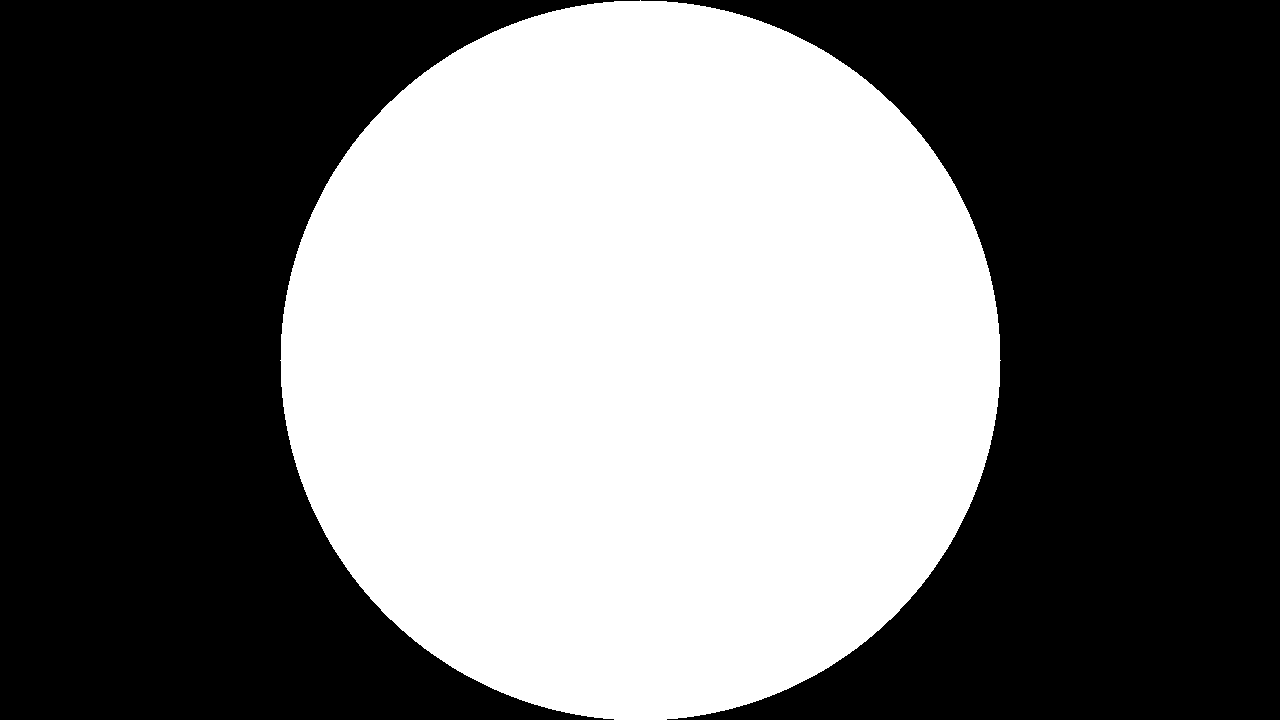

In [26]:
cv2_imshow(mask)

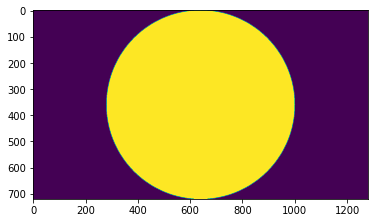

In [27]:
plt.imshow(mask)

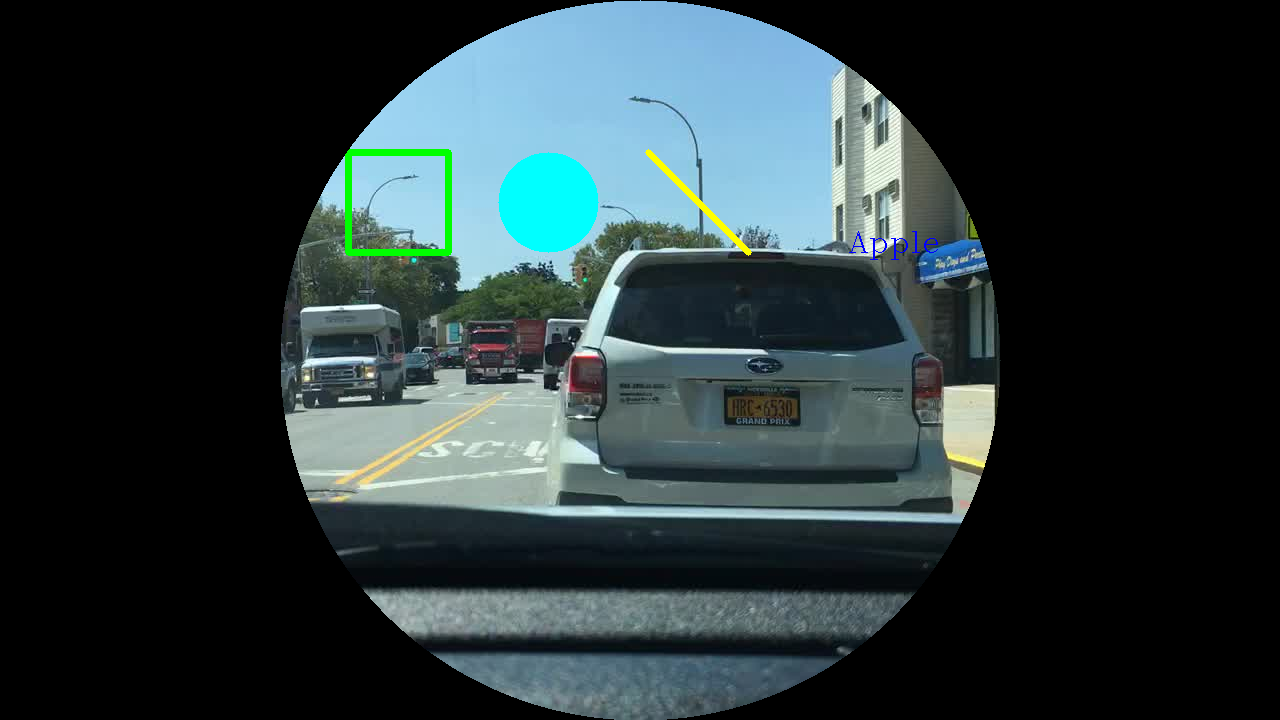

In [29]:
masked = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(masked)